In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\DataScience\Power-BI\Dataset\tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,NaN


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Unnamed: 12
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,0.0
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,NaN
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,NaN
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,NaN
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,NaN
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,NaN
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,NaN
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,NaN


In [19]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  1 non-null      object 
dtypes: float64(3), int64(5), object(6)
memory usage: 45.8+ KB


In [21]:
df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1,NaN,
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,1,NaN,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,2,NaN,NaN
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,NaN,NaN
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,1,NaN,NaN


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Unnamed: 12    418
Unnamed: 13    417
dtype: int64

In [23]:
df= df.drop(columns='Cabin')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Unnamed: 12,Unnamed: 13
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1,NaN,
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,1,NaN,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,2,NaN,NaN
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,NaN,NaN
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,1,NaN,NaN


In [24]:
df= df.drop(columns='PassengerId')
x=df[['Sex','Pclass','SibSp','Parch','Embarked']].values
y=df[['Survived']].values

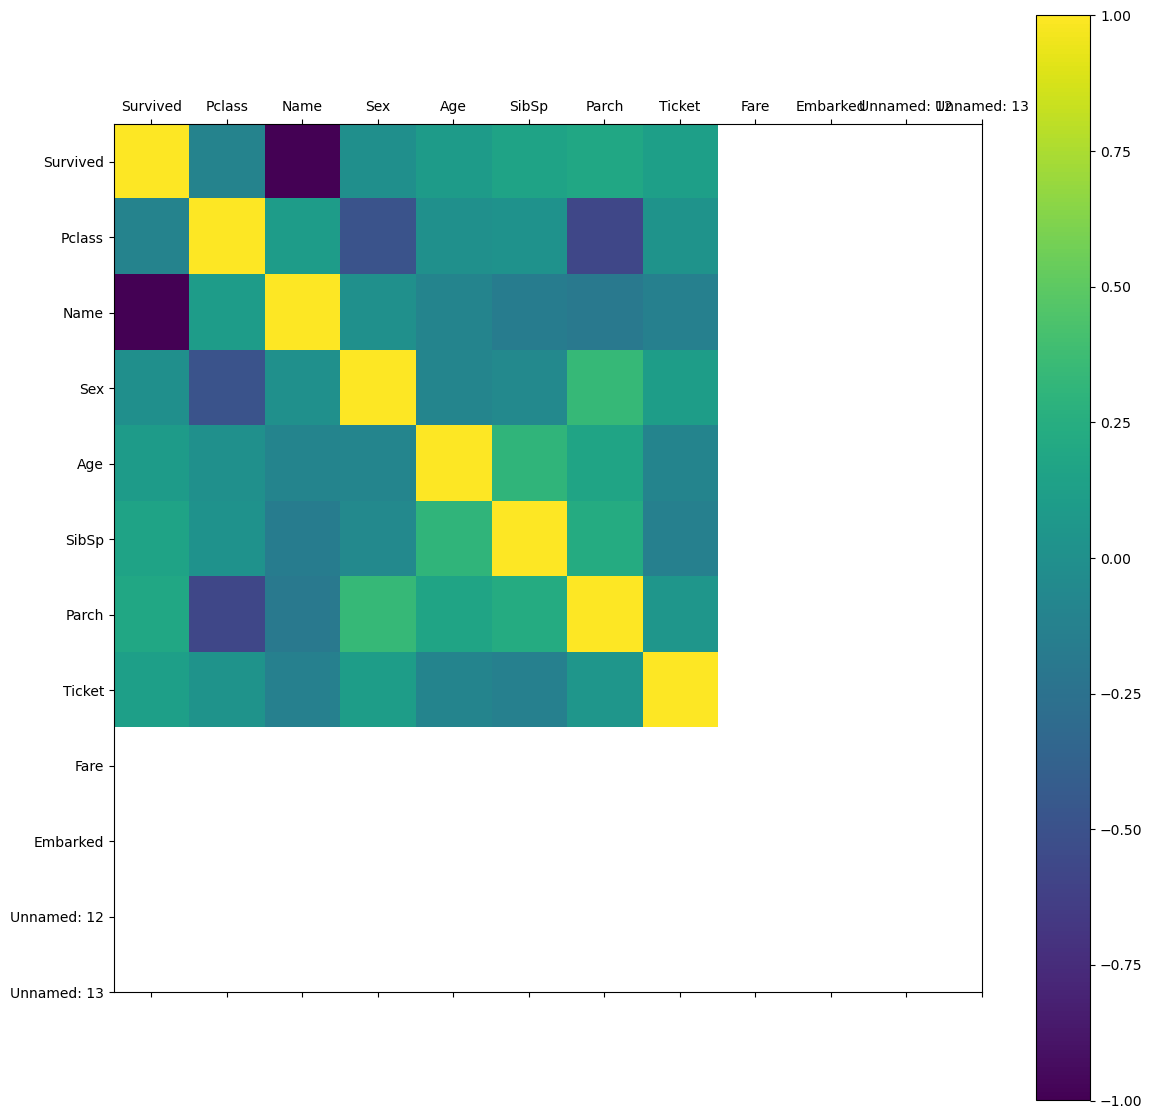

In [25]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]),df.columns)
plt.xticks(np.arange(df.shape[1]),df.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>,
        <AxesSubplot:title={'center':'Unnamed: 12'}>]], dtype=object)

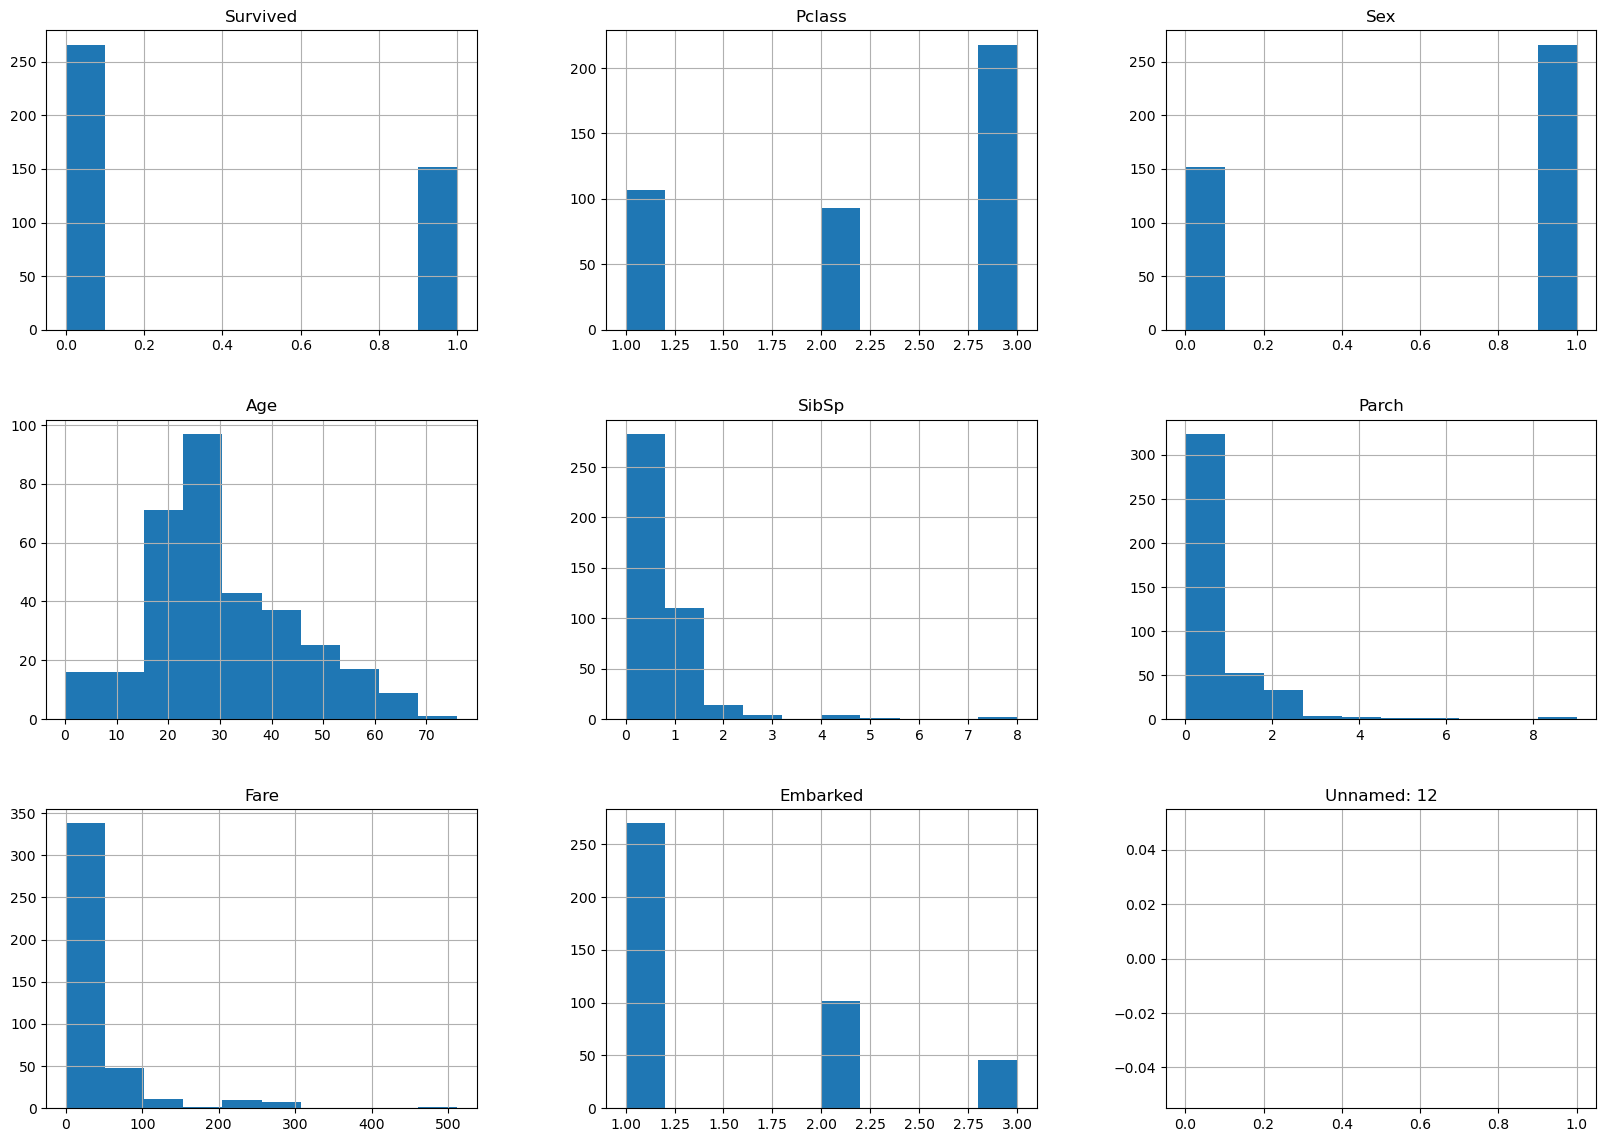

In [26]:
df.hist()

Text(0.5, 1.0, 'Count of each Survived Class')

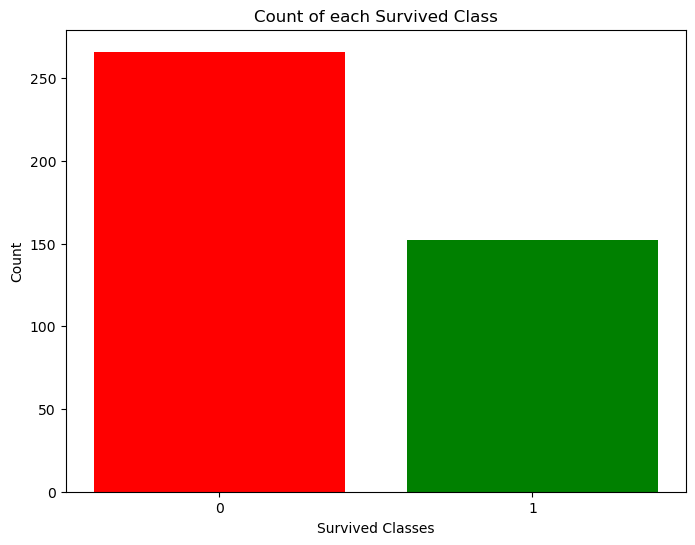

In [27]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['Survived'].unique(),df['Survived'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Survived Classes')
plt.ylabel('Count')
plt.title('Count of each Survived Class')

In [28]:
standardScaler = StandardScaler()
columns_to_scale = ['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [29]:
x_train, x_test , y_train ,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [30]:
model = LogisticRegression( C=0.1,penalty='l1',solver='liblinear' )
model.fit(x_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [31]:
model.score(x_train,y_train)

1.0

In [32]:
print('Training Accuracy: %.2f' %model.score(x_train,y_train))
print('Test Accuracy: %.2f' %model.score(x_test,y_test))

Training Accuracy: 1.00
Test Accuracy: 1.00
